#**Telco Customer Churn Prediction**


*   **S. Gowrisankar**
*   **IIT ID - 20240046**
*   **RGU ID - 2507578**
*   **Group - B**





#**1. Import Dataset and Load Dataset**

In [30]:
from google.colab import files
import pandas as pd

print("Please upload the Telco Customer Churn CSV file.")
uploaded = files.upload()

#read the uploaded file automatically
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\nUpload successful. First few rows of the dataset:")
df.head()

Please upload the Telco Customer Churn CSV file.


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (3).csv

Upload successful. First few rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#**2. Task 1 - Exploratory Data Analysis**

##**2.1. Dataset Info**

In [31]:
print("Dataframe Shape:", df.shape)
print("\nDataset Info")
df.info()
print("\n\nMissing Values in Each Column", df.isnull().sum(),"\n\n")
df.describe(include='all')

Dataframe Shape: (7043, 21)

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


##**2.2. Data Cleaning**

In [32]:
#convert TotalCharges to numeric as some fields contain empty strings
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#drop rows where TotalCharges is NaN (not a huge probelm as only a very few are there)
df = df.dropna(subset=['TotalCharges'])

#reset index after deletion
df.reset_index(drop=True, inplace=True)

print("Dataset shape after cleaning:", df.shape)


Dataset shape after cleaning: (7032, 21)


##**2.3. Visual Exploratory Data Analysis**

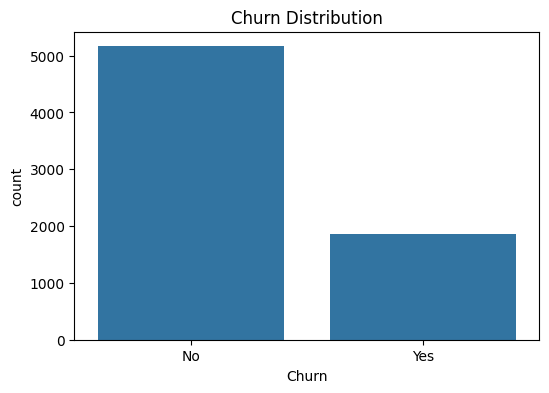

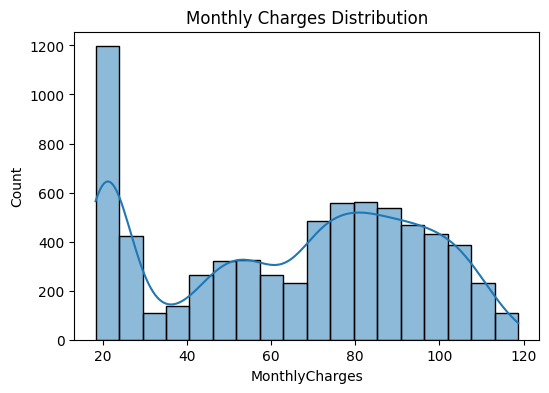

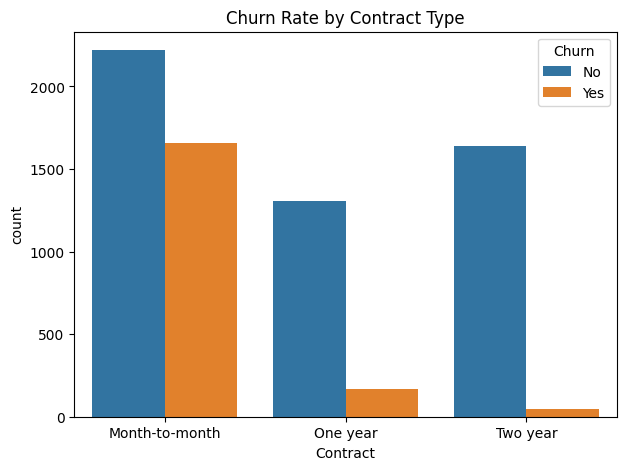

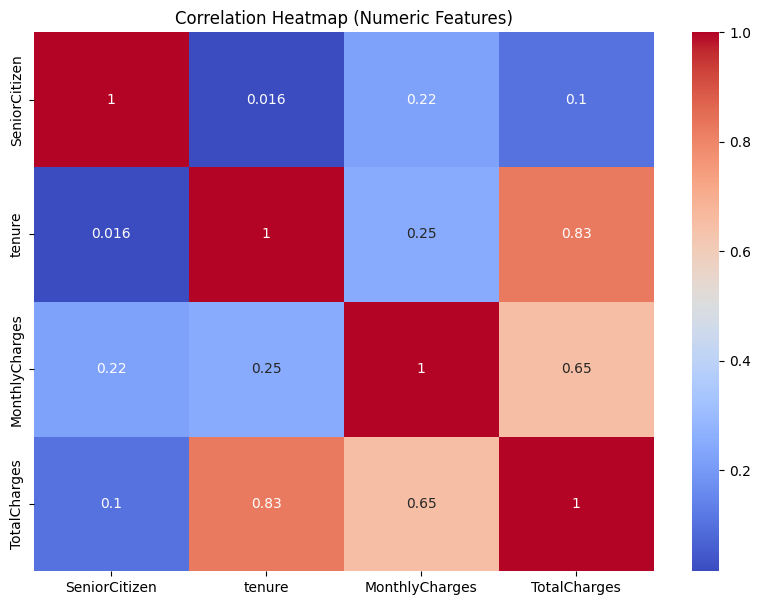

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#churn distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

#monthly charges distribution
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

#contract type effect on churn
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn Rate by Contract Type")
plt.show()

#correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


#**3. Task 2 - Data Preprocessing and Model Implementation**

##**3.1. Data Preprocessing**

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_processed = df.copy()

#encode yes/no columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

#hot encode multi category categorical columns
df_processed = pd.get_dummies(df_processed, drop_first=True)

#separate input features and target label
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

#scale numerical data for neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data Preprocessing completed!")
print("Number of features:", X_scaled.shape[1])


Data Preprocessing completed!
Number of features: 7061


##**3.2. Splitting Data to Training and Testing Sets**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 5625
Testing samples: 1407


##**3.3. Neural Network Model**

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

#building a simple feedforward neural network
nn_model = models.Sequential()
nn_model.add(layers.Dense(32, activation='relu'))
nn_model.add(layers.Dense(16, activation='relu'))
nn_model.add(layers.Dense(1, activation='sigmoid'))#for binary classification

nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

#train the model
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=1
)


Epoch 1/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7021 - loss: 0.5813 - val_accuracy: 0.7467 - val_loss: 0.4844
Epoch 2/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8828 - loss: 0.2956 - val_accuracy: 0.7689 - val_loss: 0.4729
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9853 - loss: 0.0758 - val_accuracy: 0.7573 - val_loss: 0.4954
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0191 - val_accuracy: 0.7511 - val_loss: 0.5228
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.7458 - val_loss: 0.5425
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.7396 - val_loss: 0.5603
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.7378 - val_loss: 0.5783
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accu

##**3.4. Model Evaluation**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")

print("\nModel Report:")
print(classification_report(y_test, nn_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Model Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1033
           1       0.73      0.10      0.17       374

    accuracy                           0.75      1407
   macro avg       0.74      0.54      0.51      1407
weighted avg       0.75      0.75      0.67      1407


Confusion Matrix:
[[1020   13]
 [ 338   36]]


##**3.5. Decision Tree Classifier**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,       # hyperparameter tuning option
    criterion='gini'   # alternate: "entropy"
)

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print(classification_report(y_test, dt_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))



Decision Tree Results:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
[[907 126]
 [176 198]]


##**3.6. Model Comparison**

In [39]:
from sklearn.metrics import accuracy_score

nn_acc = accuracy_score(y_test, nn_predictions)
dt_acc = accuracy_score(y_test, dt_predictions)

print("Neural Network (TensorFlow) Model Accuracy:", nn_acc)
print("Decision Tree Model Accuracy:", dt_acc)

if nn_acc > dt_acc:
    print("\nNeural Network performs better overall")
else:
    print("\nDecision Tree performs better overall")


Neural Network (TensorFlow) Model Accuracy: 0.7505330490405118
Decision Tree Model Accuracy: 0.7853589196872779

Decision Tree performs better overall
